# SI/SIS model

To run this sheet select the first block of code below and then shift+enter through each block of code and wait for the results.

#### This script is for an SI/SIS model to simulate an epidemic over time. The model consists of three differential equations describing the rate of change of variables over time. The 2 variables are:
#### u[1] = S: Susceptible population
#### u[2] = I: Infected population

![SIR overview](SIRPicture.png)

We need to use some cool software packages, this code will import them:

In [3]:
using DifferentialEquations
using Plots

### Define parameters

In [16]:
r = 2;         # number of contacts per unit time
beta = 5e-9    # Prob. of disease transmission
gamma = 0.0    # Recovery rate (Try 0.12, 0.07)
N = 6e7      # Population size N=S+I+R

6.0e7

### Define differential equations

![SIR eqns](SIREqns.png)

In [17]:
function SIS!(du,u,p,t)
    du[1] = -r.*beta.*u[1].*u[2] + gamma.*u[2]
    du[2] = r.*beta.*u[1].*u[2] - gamma.*u[2]
end

SIS! (generic function with 1 method)

In [18]:
u0 = [N,10]                   #Initial conditions
p = [r,beta,gamma]              #parameters
tspan = (0.0,100.0)               #Time course

(0.0, 100.0)

### Solve ODE

In [19]:
prob = ODEProblem(SIS!,u0,tspan,p)
sol = solve(prob);

### Plot solutions

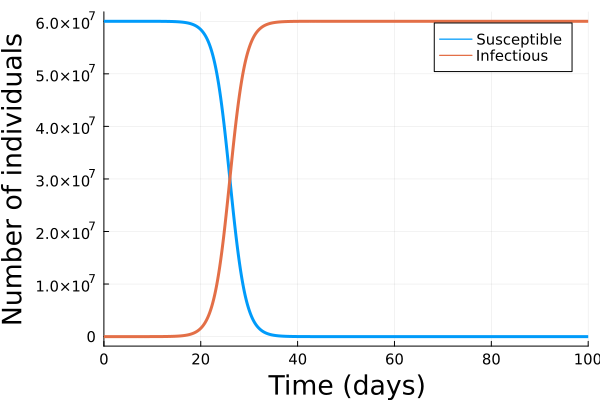

In [20]:
plot(sol,lw=3,label=["Susceptible" "Infectious"])
plot!(xlabel="Time (days)", ylabel="Number of individuals", 
    xtickfontsize=10,ytickfontsize=10,xguidefontsize=18,yguidefontsize=18,legendfontsize=10,
    fmt = :png)

# Questions to answer now  

- What happens if the recovery rate gets higher?
- What happens if the probability of transmission changes?

Hint: go back to the top of the sheet and change a parameter and then shift+enter through the whole sheet.
